<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/ProyectoDS_Parte_II_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

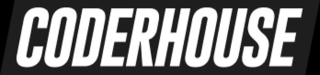

# **CURSO DE DATA SCIENCE**
# Comisión 41870

# **DESAFIO N° 4 - ESTRUCTURANDO UN PROYECTO DE DS (Parte 2)**

*AUTOR: Eduardo Ettlin

Continuarás trabajando con base en lo realizado en el Desafío entregable: **ProyectoDS_Parte_I**, en esta oportunidad deberás complementar con lo siguiente:


1. Resumen y Motivación de la Audiencia.

2. Generar preguntas de interés o hipótesis que queremos resolver con el análisis de los datos.

3. Análisis Exploratorio de Datos EDA

4. Recomendaciones en base a los insights observados

5. Definición del Objetivo, Contexto Comercial, Contexo Analítico.

In [5]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **DATASET ELEGIDO:**

Link de acceso al sitio de Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
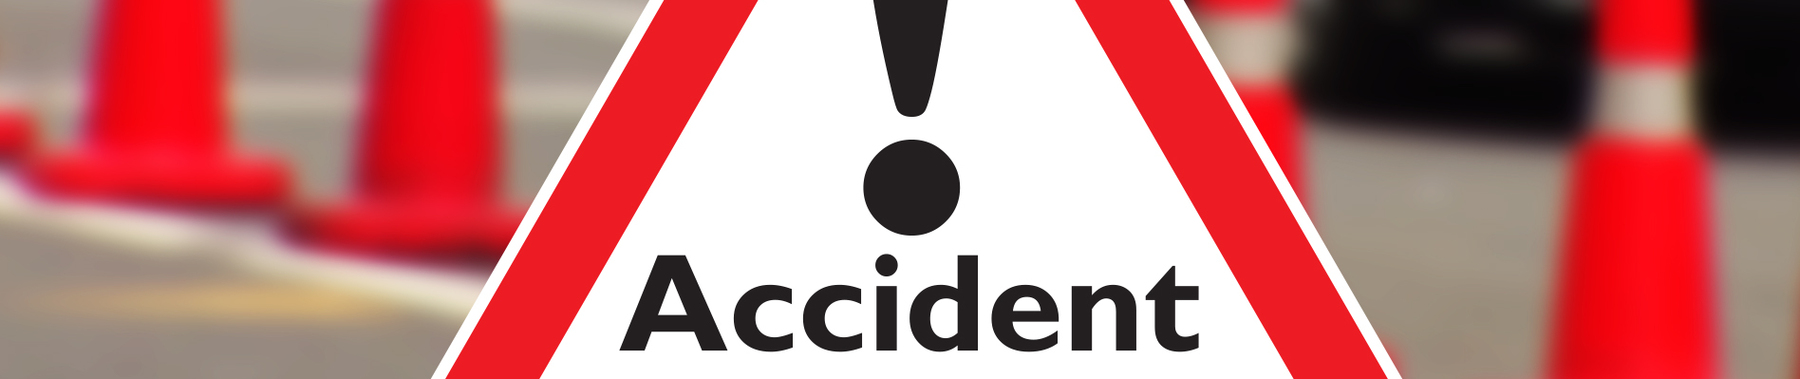


Contiene la información sobre accidentes en las principales ciudades de EE. UU. Posee una gran cantidad de variables que podrían relacionar causas y efectos de accidentes.



Accidentes en EE. UU. (2016 - 2021) Un conjunto de datos de accidentes de tráfico en todo el país (2016 - 2021)

Acerca del conjunto de datos Descripción Este es un conjunto de datos de accidentes automovilísticos de todo el país, que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico. Estas API transmiten datos de tráfico capturados por una variedad de entidades, como los departamentos de transporte estatales y de EE. UU., agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de las redes de carreteras. Actualmente, hay alrededor de 2,8 millones de registros de accidentes en este conjunto de datos. Se entrega el siguiente set de datos con nombre “US_Accidents_Dec21_updated.csv”.

Contenido Este conjunto de datos se ha recopilado en tiempo real mediante varias API de tráfico. Actualmente, contiene datos de accidentes recopilados desde febrero de 2016 hasta diciembre de 2021 para los Estados Unidos contiguos.

Inspiración “US-Accidentes” se puede utilizar para numerosas aplicaciones, como la predicción de accidentes automovilísticos en tiempo real, el estudio de ubicaciones de puntos críticos de accidentes automovilísticos, el análisis de víctimas y la extracción de reglas de causa y efecto para predecir accidentes automovilísticos, y el estudio del impacto de la precipitación u otros estímulos ambientales en la ocurrencia de accidentes. La publicación más reciente del conjunto de datos también puede ser útil para estudiar el impacto de COVID-19 en el comportamiento del tráfico y los accidentes.

Incluye dataset con mas de 2 millones de registros y 47 columnas.

## Introducción


**Contexto empresarial.** Estados Unidos ha experimentado un aumento en el número de accidentes en las carreteras. Quieren saber si el número de accidentes ha aumentado en las últimos meses. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante los últimos 5 años(desde 2016 hasta 2021).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como geologalización, hora del día, condiciones climáticas, gravedad del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, gravedad del accidente, , etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales compementarios
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por estado o cuidad? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?

# **Paquetes Utilizados**

Se importan los paquetes necesarios

In [1]:
import numpy as np # algebra lineal
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import statsmodels.formula.api as sm #regresion lineal


In [2]:
! pip install chart_studio -q
! pip install bqplot -q
! pip install pingouin -q   #quiet mode (Sin tanto detalle)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import chart_studio.plotly     as py

In [6]:
full_df =  pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv') 


**# Se visualizan los primeros datos del Dataframe con sus nombre de columna**

In [7]:
full_df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### **Se visualiza la tupla de dimensiones de matriz que indica el número de filas y columnas de un DataFrame dado.**



In [8]:
full_df.shape

(2845342, 47)

**Se visualiza La información que contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).**

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Las variables disponibles seleccionadas son:
* Severity
* Temperature(F)
* Wind_Chill(F)
* Precipitation(in)


## AJUSTES de OBJETOS y CAMPOS ADICIONALES ###

Se agrecan algunas columnas calculadas a partir de los mismos datos


In [10]:
full_df['Temp'] = full_df['Temperature(F)'] + full_df['Wind_Chill(F)'] # Crear una variable numérica

In [11]:
# full_df['Start_Time','End_Time','Weather_Timestamp'] = full_df['Start_Time','End_Time','Weather_Timestamp'].apply(pd.to_datetime(format='%Y-%m-%d %H:%M:%S'))

In [12]:
full_df['Hora'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la cual ocurrió el accidente

In [13]:
full_df['Anio_Mes'] =  pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES

In [14]:
full_df['day_of_week'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
full_df['day_of_week'] = full_df['day_of_week'].apply(lambda x: days[x])

In [15]:
full_df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temp,Hora,Anio_Mes,day_of_week
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,78.2,0,2016-02,Lunes
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,NaN,5,2016-02,Lunes
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,NaN,6,2016-02,Lunes


##Representación de los ejemplos##

El primer paso de todo análisis es realizar una exploración de los datos y analizar las distribuciones de sus variables. Es decir, aplicar las herramientas que hemos visto.

<Axes: xlabel='Severity', ylabel='Count'>

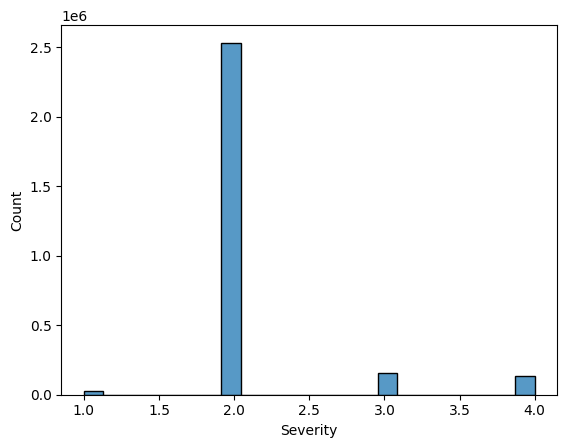

In [16]:
sns.histplot(full_df.Severity.dropna())

### Relación entre la HORA y la Cantidad y Seviridad de Accidentes ###

Fechas
Las fechas representan la variable tiempo, que no es trivial de representar en mi conjunto de datos.

¿Cómo afecta el tiempo al fenómeno que quiero estudiar?
¿Es importante de manera absoluta o de manera relativa?
¿Con qué nivel de precisión (o con qué escala) es relevante? ¿Años, días, minutos?

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) están representadas estas fechas:



<Axes: xlabel='Hora', ylabel='Count'>

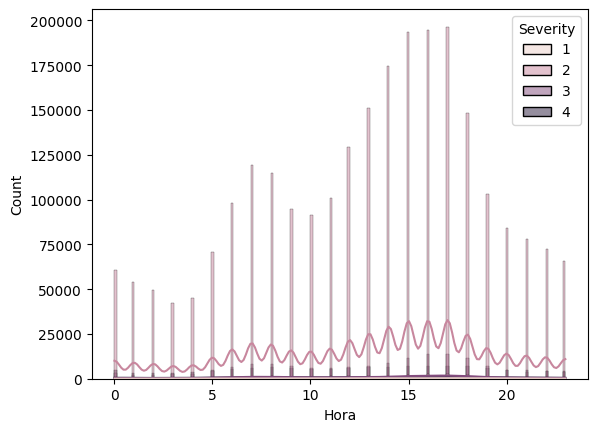

In [17]:
sns.histplot(data = full_df, x="Hora", hue ='Severity', kde = True)

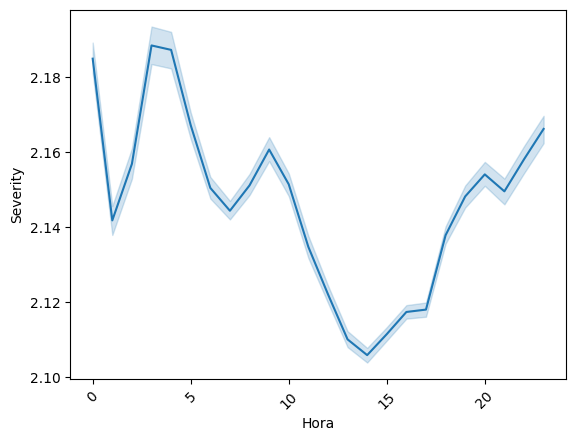

In [18]:

sns.lineplot(data = full_df, x='Hora', y='Severity')
plt.xticks(rotation=45);

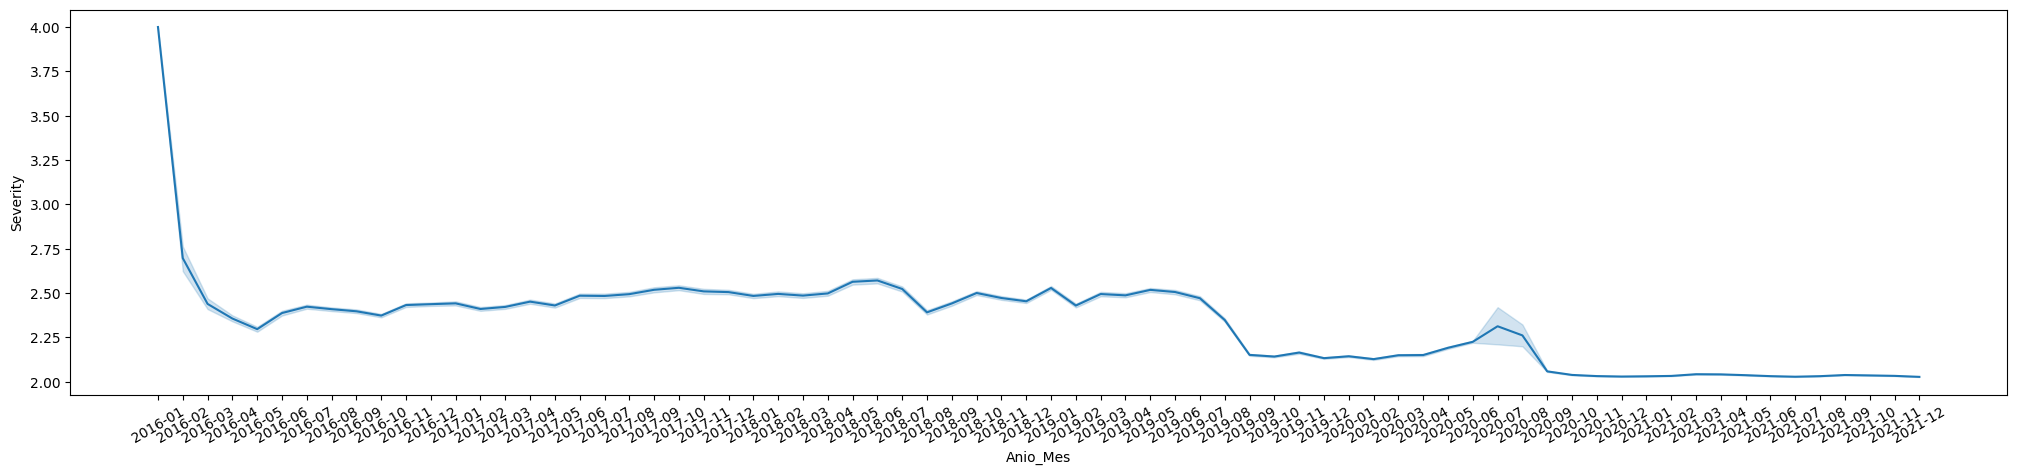

In [19]:
fig = plt.figure(figsize=(25, 5))
sns.lineplot(data=full_df.sort_values('Anio_Mes'), x='Anio_Mes', y='Severity')
plt.xticks(rotation=30);

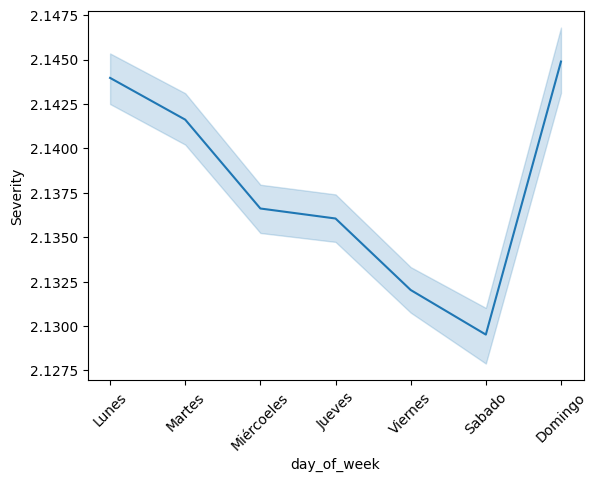

In [ ]:
sns.lineplot(data = full_df, x='day_of_week', y='Severity')
plt.xticks(rotation=45);

# **Preguntas Básicas**

¿Que tan grave son los accidentes?

¿Están relacionados con el clima?

¿Qué ciudad en EE. UU. ha informado más no. de Casos de Accidentes en los últimos 5 años (2016-2020) ?

Por día, en promedio, ¿cuántos accidentes de tráfico se produjeron en EE. UU.?

¿En qué horas del día ocurrieron la mayoría de los accidentes en EE. UU.?

¿Cómo son las condiciones climáticas básicas en la mayoría de los casos de accidentes en EE.UU.?

¿Cuáles son los 10 estados con más no. de los casos de accidentes de tráfico en EE.UU.?

#### **1ra Pregunta**

¿Influyen las Condiciones Climáticas en la Cantidad de Accidentes?


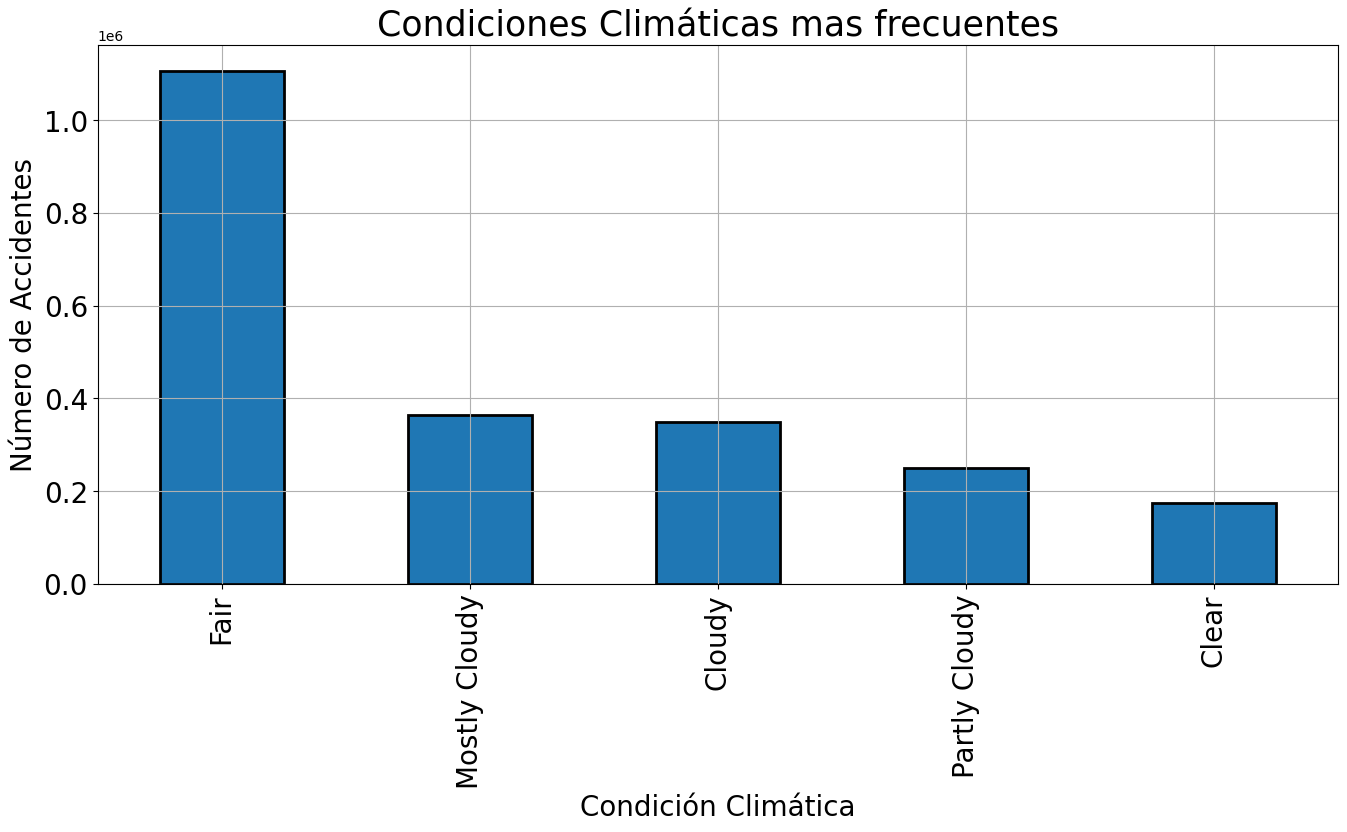

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
full_df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Condición Climática',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Condiciones Climáticas mas frecuentes',fontsize=25)
plt.grid()
plt.ioff()

## ANALISIS del DATASET 

In [ ]:
full_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06,2.375699e+06,2.845342e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03,1.206113e+02,1.277603e+01
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02,4.010177e+01,5.838369e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+02,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00,9.400000e+01,8.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00,1.260000e+02,1.400000e+01
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00,1.520000e+02,1.700000e+01
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01,3.920000e+02,2.300000e+01


##¿Hay muchas columnas en 0?


In [ ]:
cols = full_df[full_df == 0].count(axis=0)
cols[cols > 0]

Distance(mi)          385441
Number                     1
Temperature(F)           984
Wind_Chill(F)           1322
Pressure(in)               1
Visibility(mi)          3238
Wind_Speed(mph)       433636
Precipitation(in)    2104242
Amenity              2817352
Bump                 2844321
Crossing             2645130
Give_Way             2838474
Junction             2554837
No_Exit              2841048
Railway              2822711
Roundabout           2845219
Station              2777347
Stop                 2794942
Traffic_Calming      2843630
Traffic_Signal       2580079
Turning_Loop         2845342
Temp                     594
Hora                   68800
dtype: int64

Recordemos que tenemos 2.845.342 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.

## Reducción del DF para analizar correlación ##


In [20]:
small_df = full_df[['Severity', 'City', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition', 'Hora', 'day_of_week', 'Anio_Mes']]
small_df.head(7)

,Severity,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Weather_Condition,Hora,day_of_week,Anio_Mes
0,3,Dublin,Franklin,OH,42.1,36.1,58.0,29.76,10.0,Light Rain,0,Lunes,2016-02
1,2,Dayton,Montgomery,OH,36.9,NaN,91.0,29.68,10.0,Light Rain,5,Lunes,2016-02
2,2,Cincinnati,Hamilton,OH,36.0,NaN,97.0,29.70,10.0,Overcast,6,Lunes,2016-02
3,2,Akron,Summit,OH,39.0,NaN,55.0,29.65,10.0,Overcast,6,Lunes,2016-02
4,3,Cincinnati,Hamilton,OH,37.0,29.8,93.0,29.69,10.0,Light Rain,7,Lunes,2016-02
5,2,Williamsburg,Clermont,OH,35.6,29.2,100.0,29.66,10.0,Overcast,8,Lunes,2016-02
6,2,Dayton,Montgomery,OH,33.8,NaN,100.0,29.63,3.0,Mostly Cloudy,8,Lunes,2016-02


In [21]:
small_df.corr()

<ipython-input-21-8c761430cc50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  small_df.corr()


,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora
Severity,1.000000,-0.045335,-0.097459,0.037802,0.043883,0.007371,-0.018171
Temperature(F),-0.045335,1.000000,0.993857,-0.366527,0.137756,0.211134,0.170222
Wind_Chill(F),-0.097459,0.993857,1.000000,-0.346028,0.134312,0.217573,0.161464
Humidity(%),0.037802,-0.366527,-0.346028,1.000000,0.138816,-0.363305,-0.224177
Pressure(in),0.043883,0.137756,0.134312,0.138816,1.000000,0.036382,-0.015672
Visibility(mi),0.007371,0.211134,0.217573,-0.363305,0.036382,1.000000,0.079040
Hora,-0.018171,0.170222,0.161464,-0.224177,-0.015672,0.079040,1.000000


## Correlación Básica con HEAT MAP ##

<ipython-input-22-1efa4362110e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(small_df.corr(), vmin=-1, vmax=1, annot=True)


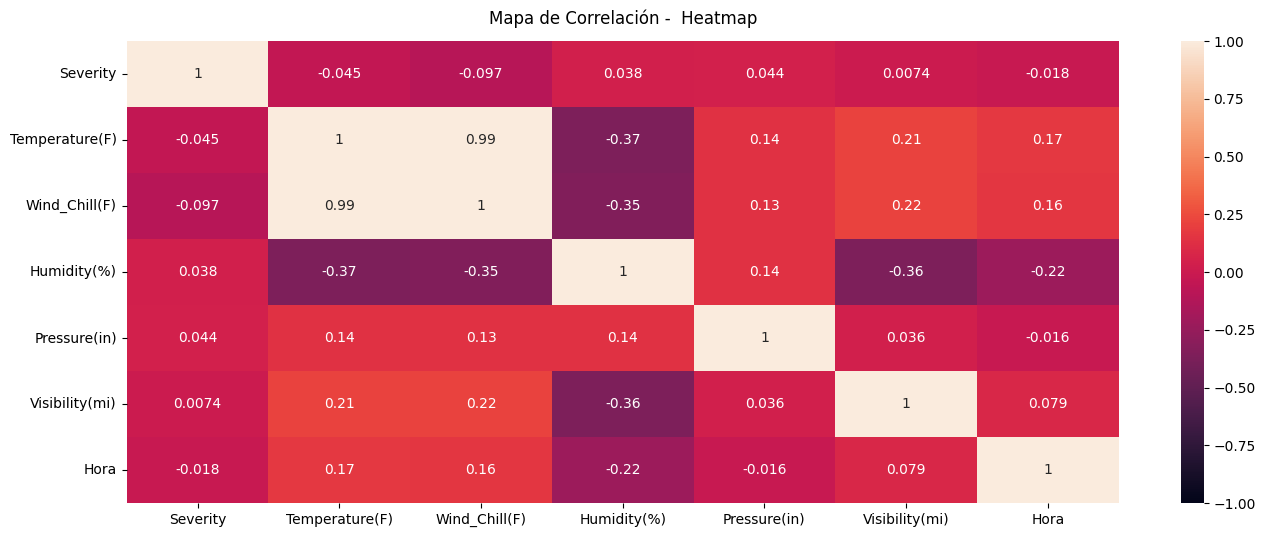

In [22]:
# Definir el Tamaplo
plt.figure(figsize=(16, 6))

# Archivar el heatmap object en una variable para manejar mejor las propiedades.
# Cambiar los valores del grafico. Colores entre  -1 y 1, y setear las anotaciones para ver las correlaciones.
heatmap = sns.heatmap(small_df.corr(), vmin=-1, vmax=1, annot=True)

# Ponérle un Tículo al mapa. 
heatmap.set_title('Mapa de Correlación -  Heatmap', fontdict={'fontsize':12}, pad=12);

In [23]:
heatmap

<Axes: title={'center': 'Mapa de Correlación -  Heatmap'}>